Analysis of Baseball Data - Report on related PDF

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
import os

In [2]:
# Data Importation

base_dir = os.path.abspath('')
file = "battedBallData.csv"
file_path = os.path.join(base_dir, file)
df = pd.read_csv(file_path)

,batter,pitcher,hittype,speed_A,vangle_A,speed_B,vangle_B
0,393,405,ground_ball,110.987569,4.194081,103.842569,3.164307
1,366,405,ground_ball,60.098403,-54.652102,28.092203,-28.324082
2,448,518,line_drive,102.757602,11.751851,97.846002,11.658800
3,140,518,fly_ball,61.952091,33.488154,59.389741,32.798274
4,521,518,line_drive,116.690861,22.700762,111.014561,23.164572


,batter,pitcher,speed_A,vangle_A,speed_B,vangle_B
count,73375.000000,73375.000000,65803.000000,65803.000000,71973.000000,71973.000000
mean,365.135005,289.957547,88.425429,10.853558,77.748243,13.094305
std,229.816539,186.406565,13.192938,24.024058,18.621538,24.429536
min,1.000000,1.000000,26.461824,-91.898629,5.152318,-85.090929
25%,170.000000,121.000000,80.362652,-5.558918,66.074054,-4.634815
50%,341.000000,283.000000,90.638747,11.005251,81.886750,10.546230
75%,550.000000,447.000000,98.317818,27.404976,92.326944,28.880589
max,816.000000,645.000000,121.847456,78.460978,114.403356,90.900819


C:\Users\Anthony_Laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anthony_Laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Anthony_Laptop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

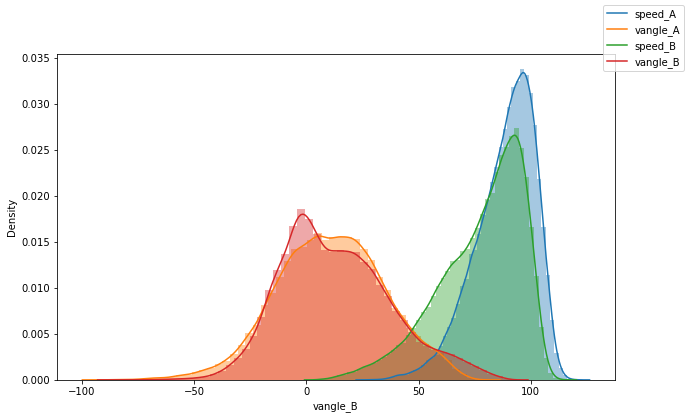

In [3]:
# Data Exploration

display(df.head())
display(df.describe())

fig = plt.figure(figsize=(10,6))
cols = ["speed_A", "vangle_A", "speed_B", "vangle_B"]
for i in cols:
    sns.distplot(df.loc[:, i].dropna())

fig.legend(labels= cols)
plt.show()

In [4]:
# Data Exploration Continued

"""
Subset data into groups such that there is data for when System A has missing data (miss_A),
when System B has missing data (miss_A), and when both Systems are missing data (miss_both) in order 
to identify trends in when data may be missing.
"""

miss_A = df[df['speed_A'].isnull()]
miss_B = df[df['speed_B'].isnull()]
miss_both = df.loc[df.isnull().sum(1)>3]

# Print Batted Ball Hit Types for Each Subset Group
print("Type Frequencies of Raw Batted Ball Data")
print(df['hittype'].value_counts(normalize = True))
print()
print("Type Frequencies of miss_A Batted Ball Data")
print(miss_A['hittype'].value_counts(normalize = True))
print()
print("Type Frequencies of miss_B Batted Ball Data")
print(miss_B['hittype'].value_counts(normalize = True))
print()
print("Type Frequencies of miss_both Batted Ball Data")
print(miss_both['hittype'].value_counts(normalize = True))
print()


display(miss_A.describe())
display(miss_B.describe())

Type Frequencies of Raw Batted Ball Data
ground_ball    0.453002
line_drive     0.247578
fly_ball       0.227898
popup          0.071496
U              0.000027
Name: hittype, dtype: float64

Type Frequencies of miss_A Batted Ball Data
ground_ball    0.606313
popup          0.323032
fly_ball       0.036450
line_drive     0.034073
U              0.000132
Name: hittype, dtype: float64

Type Frequencies of miss_B Batted Ball Data
ground_ball    0.485735
popup          0.253210
fly_ball       0.168331
line_drive     0.092725
Name: hittype, dtype: float64

Type Frequencies of miss_both Batted Ball Data
ground_ball    0.544280
popup          0.435424
fly_ball       0.016605
line_drive     0.003690
Name: hittype, dtype: float64



,batter,pitcher,speed_A,vangle_A,speed_B,vangle_B
count,7572.000000,7572.000000,0.0,0.0,7030.000000,7030.000000
mean,370.024036,287.160592,NaN,NaN,58.244131,19.020437
std,229.649905,184.347655,NaN,NaN,21.407526,42.354411
min,1.000000,1.000000,NaN,NaN,5.152318,-85.090929
25%,177.000000,121.000000,NaN,NaN,41.910077,-18.692430
50%,344.000000,282.000000,NaN,NaN,59.675640,12.054111
75%,555.000000,438.000000,NaN,NaN,75.186641,65.778638
max,815.000000,645.000000,NaN,NaN,112.208141,90.900819


,batter,pitcher,speed_A,vangle_A,speed_B,vangle_B
count,1402.000000,1402.000000,860.000000,860.000000,0.0,0.0
mean,352.241797,293.992154,81.959593,13.143328,NaN,NaN
std,225.172129,191.449523,15.879582,35.593616,NaN,NaN
min,3.000000,1.000000,32.975008,-91.898629,NaN,NaN
25%,155.000000,126.000000,72.509009,-12.801035,NaN,NaN
50%,323.000000,281.000000,84.119723,12.132233,NaN,NaN
75%,524.750000,467.000000,94.158599,45.711172,NaN,NaN
max,815.000000,645.000000,115.739601,74.237472,NaN,NaN


In [5]:
# Batter Profiles

# Data Where at Least One System Has Data
df = df.dropna(axis = 0, thresh = 5)
# Print Pearson Correlation Coefficeient Matrix
display(df.corr(method ='pearson'))

"""
Record Averages for all Players. Information stored in the dictionary batterInfo, which has player ID as the key
and list containing count of batted balls, average exit velociity, and average launch angle as the value
"""
batterInfo = {}
for index, row in df.iterrows():
    if row["batter"] in batterInfo:
        if pd.notna(row["speed_A"]) and pd.notna(row["vangle_A"]):
            count = batterInfo[row["batter"]][0] + 1
            avgVel = (batterInfo[row["batter"]][1] + row["speed_A"])/count
            avgAng = (batterInfo[row["batter"]][2] + row["vangle_A"])/count
        else:
            count = batterInfo[row["batter"]][0] + 1
            avgVel = (batterInfo[row["batter"]][1] + row["speed_B"])/count
            avgAng = (batterInfo[row["batter"]][2] + row["vangle_B"])/count
        batterInfo[row["batter"]] = [count, avgVel, avgAng]
    else:
        if pd.notna(row["speed_A"]) and pd.notna(row["vangle_A"]):
            count = 1
            avgVel = row["speed_A"]
            avgAng = row["vangle_A"]
        else:
            count = 1
            avgVel = row["speed_B"]
            avgAng = row["vangle_B"]
        batterInfo[row["batter"]] = [count, avgVel, avgAng]

,batter,pitcher,speed_A,vangle_A,speed_B,vangle_B
batter,1.000000,0.011015,-0.002114,-0.008364,-0.014262,-0.003904
pitcher,0.011015,1.000000,0.002755,-0.014655,-0.005100,-0.015217
speed_A,-0.002114,0.002755,1.000000,0.120253,0.816779,0.045633
vangle_A,-0.008364,-0.014655,0.120253,1.000000,0.489309,0.966602
speed_B,-0.014262,-0.005100,0.816779,0.489309,1.000000,0.348120
vangle_B,-0.003904,-0.015217,0.045633,0.966602,0.348120,1.000000
